In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

W0323 21:02:01.741299 140297884493696 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14
Using TensorFlow backend.


In [2]:
url = 'https://tfhub.dev/google/universal-sentence-encoder-large/3'
embed = hub.Module(url)

Instructions for updating:
Colocations handled automatically by placer.


W0323 21:02:09.124588 140297884493696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/Semeval2019Task9/Subtask-A/master/V1.4_Training.csv", header=None, encoding='latin1')
test = pd.read_csv('https://raw.githubusercontent.com/Semeval2019Task9/Subtask-A/master/SubtaskA_Trial_Test_Labeled.csv', encoding='latin1')
evaluation = pd.read_csv('https://raw.githubusercontent.com/Semeval2019Task9/Subtask-A/master/SubtaskA_EvaluationData.csv', header=None, encoding='latin1')



In [6]:
evaluation.head()

,0,1,2
0,9566,This would enable live traffic aware apps.,X
1,9569,Please try other formatting like bold italics ...,X
2,9576,Since computers were invented to save time I s...,X
3,9577,Allow rearranging if the user wants to change ...,X
4,9579,Add SIMD instructions for better use of ARM NE...,X


In [0]:
def convert_labels(y):
  return keras.utils.to_categorical(y)



In [0]:
x_train = train[1]
y_train = train[2]
y_train_cat = convert_labels(y_train)

x_test = test['sentence']
y_test = test['label']
y_test_cat = convert_labels(y_test)

x_eval = evaluation[1]

In [10]:
print(f"Number of Training samples is {x_train.shape[0]}")
print(f"Number of Testing samples is {x_test.shape[0]}")
print(f"Number of Evaluation samples is {x_eval.shape[0]}")

Number of Training samples is 8500
Number of Testing samples is 592
Number of Evaluation samples is 833


In [0]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, Bidirectional, MaxPooling1D, Flatten
from keras.models import Sequential
import keras.backend as K


def create_model():
 
  model = Sequential([
      
      Dense(512, activation='relu', input_dim=512),
      Dense(256, activation='relu'),
      Dropout(0.25),
      Dense(64, activation='relu'),
      Dropout(0.2),
      
      Dense(2, activation='softmax')
  ])
  
  
  return model

In [0]:
def get_embeddings(data):
  with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    embeddings = session.run(embed(data))
    return embeddings

In [0]:
x_train_splits = np.array_split(x_train.values, 17)

In [0]:
x_train_splits = np.array(x_train_splits)

In [17]:
train_embeddings = []

for split in x_train_splits:
  embedding = get_embeddings(split)
  train_embeddings.append(embedding)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:04:45.045023 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:04:50.867978 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:04:56.839063 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:05:03.471924 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:05:10.370259 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:05:17.348318 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:05:25.550777 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:05:34.400871 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:05:43.864209 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:05:53.813022 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:06:04.518422 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:06:15.950378 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:06:27.760559 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:06:40.264355 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:06:53.537729 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:07:07.612642 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:07:22.115039 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [0]:
train_embeddings = np.array(train_embeddings)

In [19]:
train_embeddings.shape

(17, 500, 512)

In [20]:
train_embeddings = train_embeddings.reshape(-1, train_embeddings.shape[-1])
train_embeddings.shape

(8500, 512)

In [21]:
test_embeddings = get_embeddings(x_test.values)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:08:29.658109 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [22]:
eval_embeddings = get_embeddings(x_eval.values)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0323 21:09:04.719230 140297884493696 saver.py:1483] Saver not created because there are no variables in the graph to restore


In [0]:
import pickle

train_embeddings_file = "train_embeddings-{}.pickle".format(len(train_embeddings))

pickle.dump(train_embeddings, open(train_embeddings_file, 'wb'))

test_embeddings_file = "test_embeddings-{}.pickle".format(len(test_embeddings))

pickle.dump(test_embeddings, open(test_embeddings_file, 'wb'))

eval_embeddings_file = "eval_embeddings-{}.pickle".format(len(eval_embeddings))

pickle.dump(eval_embeddings, open(eval_embeddings_file, 'wb'))

In [0]:
!mv *.pickle 'drive/My Drive'

In [27]:
model = create_model()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0323 21:11:47.653791 140297884493696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 410,562
Trainable params: 410,562
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(train_embeddings, y_train_cat, epochs=5, batch_size=500)

Instructions for updating:
Use tf.cast instead.


W0323 21:12:50.457258 140297884493696 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Epoch 1/5
8500/8500 [==============================] - 15s 2ms/step - loss: 0.5116 - acc: 0.7318
Epoch 2/5
8500/8500 [==============================] - 0s 17us/step - loss: 0.3126 - acc: 0.8682
Epoch 3/5
8500/8500 [==============================] - 0s 15us/step - loss: 0.2694 - acc: 0.8908
Epoch 4/5
8500/8500 [==============================] - 0s 15us/step - loss: 0.2471 - acc: 0.8984
Epoch 5/5
8500/8500 [==============================] - 0s 16us/step - loss: 0.2346 - acc: 0.9018


In [0]:
test_preds = model.predict(test_embeddings)

In [0]:
test_preds = np.argmax(test_preds, axis=1)



In [34]:
test_preds

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

class evaluate_model():
  def __init__(self, y_true, y_pred):
    self.y_true = y_true
    self.y_pred = y_pred
  
  def plot_cm(self, normalize=False):
    cm = confusion_matrix(self.y_true, self.y_pred)
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
  
  def get_report(self):
    print(classification_report(self.y_true, self.y_pred))
  
  def get_accuracy(self):
    print(accuracy_score(self.y_true, self.y_pred))

In [0]:
eval_model = evaluate_model(y_test, test_preds)

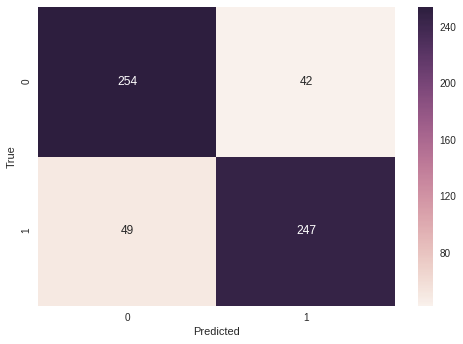

In [37]:
eval_model.plot_cm()

In [38]:
eval_model.get_report()

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       296
           1       0.85      0.83      0.84       296

   micro avg       0.85      0.85      0.85       592
   macro avg       0.85      0.85      0.85       592
weighted avg       0.85      0.85      0.85       592



In [39]:
eval_model.get_accuracy()

0.8462837837837838


In [0]:
import xgboost as xgb

In [0]:
xg_model = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

In [0]:
xg_model_train = xg_model.fit(train_embeddings, y_train)

In [0]:
xg_preds = xg_model_train.predict(test_embeddings)

In [0]:
xg_eval = evaluate_model(xg_preds, y_test)

In [99]:
xg_eval.get_report()

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       345
           1       0.74      0.88      0.80       247

   micro avg       0.82      0.82      0.82       592
   macro avg       0.82      0.83      0.82       592
weighted avg       0.83      0.82      0.82       592



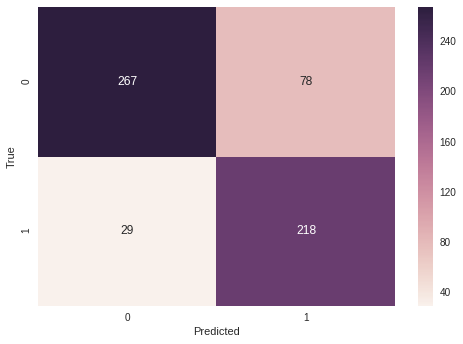

In [100]:
xg_eval.plot_cm()

In [101]:
xg_eval.get_accuracy()

0.8192567567567568


In [0]:
eval_preds = model.predict(eval_embeddings)

In [0]:
eval_preds_classes = np.argmax(eval_preds, axis=1)

In [110]:
eval_preds_classes.shape

(833,)

In [0]:
evaluation[2] = eval_preds_classes

In [116]:
evaluation[2].value_counts()

0    729
1    104
Name: 2, dtype: int64

In [0]:
eval_preds_xg = xg_model.predict(eval_embeddings)

In [0]:
evaluation['xgboost'] = eval_preds_xg

In [131]:
evaluation['xgboost'].value_counts()

0    760
1     73
Name: xgboost, dtype: int64

In [0]:
from keras.layers import Dense, Dropout, LSTM, Conv1D, Bidirectional, MaxPooling1D, Flatten
from keras.models import Sequential
import keras.backend as K


def create_new_model():
 
  model = Sequential([
      
      Dense(512, activation='relu', input_dim=512),
      Dense(256, activation='relu'),
      Dense(256, activation='relu'),
      Dropout(0.25),
      Dense(128, activation='relu'),
      Dropout(0.2),
      
      Dense(2, activation='softmax')
  ])
  
  
  return model

In [0]:
new_model = create_new_model()

In [0]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [135]:
new_model.fit(train_embeddings, y_train_cat, epochs=25, batch_size=500)

Epoch 1/25
8500/8500 [==============================] - 17s 2ms/step - loss: 0.4906 - acc: 0.7287
Epoch 2/25
8500/8500 [==============================] - 0s 17us/step - loss: 0.3148 - acc: 0.8519
Epoch 3/25
8500/8500 [==============================] - 0s 17us/step - loss: 0.2575 - acc: 0.8944
Epoch 4/25
8500/8500 [==============================] - 0s 17us/step - loss: 0.2360 - acc: 0.9013
Epoch 5/25
8500/8500 [==============================] - 0s 19us/step - loss: 0.2179 - acc: 0.9122
Epoch 6/25
8500/8500 [==============================] - 0s 19us/step - loss: 0.1977 - acc: 0.9236
Epoch 7/25
8500/8500 [==============================] - 0s 18us/step - loss: 0.1760 - acc: 0.9308
Epoch 8/25
8500/8500 [==============================] - 0s 18us/step - loss: 0.1490 - acc: 0.9438
Epoch 9/25
8500/8500 [==============================] - 0s 18us/step - loss: 0.1280 - acc: 0.9513
Epoch 10/25
8500/8500 [==============================] - 0s 17us/step - loss: 0.1105 - acc: 0.9586
Epoch 11/25
8500/85

In [0]:
new_model_preds = new_model.predict(test_embeddings)

In [0]:
new_model_preds_classes = np.argmax(new_model_preds, axis=1)

In [0]:
eval_new_model = evaluate_model(y_test, new_model_preds_classes)

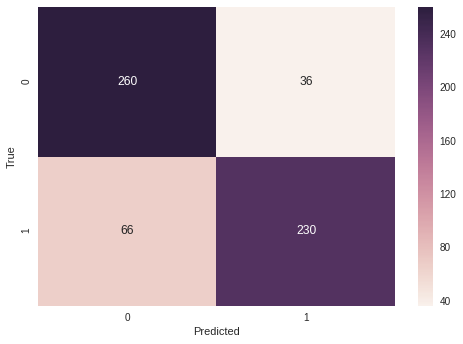

In [140]:
eval_new_model.plot_cm()

In [141]:
eval_new_model.get_accuracy()

0.8277027027027027


In [142]:
eval_new_model.get_report()

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       296
           1       0.86      0.78      0.82       296

   micro avg       0.83      0.83      0.83       592
   macro avg       0.83      0.83      0.83       592
weighted avg       0.83      0.83      0.83       592



In [143]:
model.evaluate(test_embeddings, y_test_cat)

592/592 [==============================] - 7s 12ms/step


[0.37443102453206034, 0.8462837837837838]

In [0]:
submission = evaluation.drop(['xgboost'], axis=1)

In [0]:
submission.to_csv('anmol_goel.csv')

In [0]:
files.download('anmol_goel.csv')